Importamos los modulos necesarios para el proyecto

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


<h5>La predicion que haremos en este dataset sera la siguiente:</h5>
<h5>Queremos determinar que afecta el precio de un vehiculo</h5>

<h4>Mostramos el diccionario</h4>

In [2]:
print("Based on various market surveys, the consulting firm has gathered a large dataset of different types of used cars across the market.\n\nData Dictionary:\n\n1. Sales_ID (Sales ID)\n2. name (Name of the used car)\n3. year (Year of the car purchase)\n4. selling_price (Current selling price for used car)\n5. km_driven (Total km driven)\n6. Region (Region where it is used)\n7. State or Province (State or Province where it is used)\n8. City (City where it is used)\n9. fuel (Fuel type)\n10. seller_type (Who is selling the car)\n11. transmission (Transmission type of the car)\n12. owner (Owner type)\n13. mileage (Mileage of the car)\n14. engine (engine power)\n15. max_power (max power)\n16. seats (Number of seats)\n17. sold (used car sold or not)")

Based on various market surveys, the consulting firm has gathered a large dataset of different types of used cars across the market.

Data Dictionary:

1. Sales_ID (Sales ID)
2. name (Name of the used car)
3. year (Year of the car purchase)
4. selling_price (Current selling price for used car)
5. km_driven (Total km driven)
6. Region (Region where it is used)
7. State or Province (State or Province where it is used)
8. City (City where it is used)
9. fuel (Fuel type)
10. seller_type (Who is selling the car)
11. transmission (Transmission type of the car)
12. owner (Owner type)
13. mileage (Mileage of the car)
14. engine (engine power)
15. max_power (max power)
16. seats (Number of seats)
17. sold (used car sold or not)


<h4>Leemos el dataframe</h4>

In [3]:
df = pd.read_csv('UserCarData.csv')  
df.head(30)


,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y
5,6,Hyundai,2017,440000,45000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,20.14,1197,81.86,113.75nm@ 4000rpm,5,Y
6,7,Maruti,2007,96000,175000,West,California,Los Angeles,LPG,Individual,Manual,First_Owner,17.30,1061,57.50,"7.8@ 4,500(kgm@ rpm)",5,Y
7,8,Maruti,2001,45000,5000,West,California,Los Angeles,Petrol,Individual,Manual,Second_Owner,16.10,796,37.00,59Nm@ 2500rpm,4,Y
8,9,Toyota,2011,350000,90000,West,California,Los Angeles,Diesel,Individual,Manual,First_Owner,23.59,1364,67.10,170Nm@ 1800-2400rpm,5,Y
9,10,Ford,2013,200000,169000,Central,Texas,Houston,Diesel,Individual,Manual,First_Owner,20.00,1399,68.10,160Nm@ 2000rpm,5,Y


### Evaluamos los valores faltantes
Para este proceso creo un nuevo DF llamado missing_values_isnull y la funcion .isnull para poder saber los valores nulos

In [4]:
missing_data = df.isnull()


In [5]:
missing_data.head(5)

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<h4>Contar los valores que faltan en cada columna</h4> 
Utilizamos el bucle for, el cual nos ayuda a  calcular rápidamente el número de valores que faltan en cada columna. En este caso "True" representa un valor que falta y "False" significa que el valor está presente en el conjunto de datos.

In [6]:
for column in missing_data.columns.values.tolist():
    print (missing_data[column].value_counts())
    print("")    

Sales_ID
False    7906
Name: count, dtype: int64

name
False    7906
Name: count, dtype: int64

year
False    7906
Name: count, dtype: int64

selling_price
False    7906
Name: count, dtype: int64

km_driven
False    7906
Name: count, dtype: int64

Region
False    7906
Name: count, dtype: int64

State or Province
False    7906
Name: count, dtype: int64

City
False    7906
Name: count, dtype: int64

fuel
False    7906
Name: count, dtype: int64

seller_type
False    7906
Name: count, dtype: int64

transmission
False    7906
Name: count, dtype: int64

owner
False    7906
Name: count, dtype: int64

mileage
False    7906
Name: count, dtype: int64

engine
False    7906
Name: count, dtype: int64

max_power
False    7906
Name: count, dtype: int64

torque
False    7906
Name: count, dtype: int64

seats
False    7906
Name: count, dtype: int64

sold
False    7906
Name: count, dtype: int64



In [7]:
df.dtypes

Sales_ID               int64
name                  object
year                   int64
selling_price          int64
km_driven              int64
Region                object
State or Province     object
City                  object
fuel                  object
seller_type           object
transmission          object
owner                 object
mileage              float64
engine                 int64
max_power            float64
torque                object
seats                  int64
sold                  object
dtype: object

Realizamos un analisis descriptivo de las varibales numericas y categorias que tenemos en el dataframe

In [8]:
# Análisis descriptivo de variables numéricas
numeric_variables = ['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
numeric_stats = df[numeric_variables].describe()
print("Estadísticas descriptivas de variables numéricas:")
print(numeric_stats)

# Análisis descriptivo de variables categóricas
categorical_variables = ['Region', 'State or Province', 'fuel', 'seller_type', 'transmission', 'owner', 'sold']
for column in categorical_variables:
    print("\nConteo de valores únicos para la variable:", column)
    print(df[column].value_counts())

Estadísticas descriptivas de variables numéricas:
       selling_price     km_driven      mileage       engine    max_power  \
count   7.906000e+03  7.906000e+03  7906.000000  7906.000000  7906.000000   
mean    6.498137e+05  6.918866e+04    19.419861  1458.708829    91.587374   
std     8.135827e+05  5.679230e+04     4.036263   503.893057    35.747216   
min     2.999900e+04  1.000000e+00     0.000000   624.000000    32.800000   
25%     2.700000e+05  3.500000e+04    16.780000  1197.000000    68.050000   
50%     4.500000e+05  6.000000e+04    19.300000  1248.000000    82.000000   
75%     6.900000e+05  9.542500e+04    22.320000  1582.000000   102.000000   
max     1.000000e+07  2.360457e+06    42.000000  3604.000000   400.000000   

             seats  
count  7906.000000  
mean      5.416393  
std       0.959208  
min       2.000000  
25%       5.000000  
50%       5.000000  
75%       5.000000  
max      14.000000  

Conteo de valores únicos para la variable: Region
Region
Central  

Realizamos la correlacion de algunas variables que desde un inicio son numericas y son posibles candidatas a ser importantes para el modelo de prediccion

In [9]:
# Write your code below and press Shift+Enter to execute 
df[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].corr()

,selling_price,km_driven,mileage,engine,max_power,seats
selling_price,1.000000,-0.222158,-0.126280,0.455682,0.749674,0.041617
km_driven,-0.222158,1.000000,-0.172980,0.206031,-0.038159,0.227259
mileage,-0.126280,-0.172980,1.000000,-0.576408,-0.374621,-0.451700
engine,0.455682,0.206031,-0.576408,1.000000,0.703975,0.611103
max_power,0.749674,-0.038159,-0.374621,0.703975,1.000000,0.191999
seats,0.041617,0.227259,-0.451700,0.611103,0.191999,1.000000


El coeficiente de correlación de Pearson, también conocido como r de Pearson, es una medida estadística que evalúa la relación lineal entre dos variables cuantitativas. Este coeficiente varía entre -1 y 1, donde:

1 indica una correlación positiva perfecta: cuando una variable aumenta, la otra también lo hace en la misma proporción.
-1 indica una correlación negativa perfecta: cuando una variable aumenta, la otra disminuye en la misma proporción.
0 indica que no hay correlación entre las variables.

In [10]:
print("max_power (0.749674) Esta variable tiene una correlación positiva fuerte con selling_price. Esto significa que a medida que la potencia máxima del vehículo aumenta, es probable que el precio de venta también aumente.\n")
print("engine (0.455682): Esta variable tiene una correlación positiva moderada con selling_price. Esto sugiere que los vehículos con motores más grandes pueden tener un precio de venta más alto.\n")
print("km_driven (-0.222158): Esta variable tiene una correlación negativa débil con selling_price. Esto podría sugerir que los vehículos que han sido conducidos más kilómetros tienden a tener un precio de venta más bajo.\n")
print("mileage (-0.126280): Esta variable tiene una correlación negativa débil con selling_price. Esto podría indicar que los vehículos con mayor rendimiento de combustible podrían tener un precio de venta más bajo, aunque la correlación es bastante débil.\n")
print("seats (0.041617): Esta variable tiene una correlación muy débil con selling_price. Esto sugiere que el número de asientos en un vehículo tiene poco o ningún efecto en el precio de venta.\n")

max_power (0.749674) Esta variable tiene una correlación positiva fuerte con selling_price. Esto significa que a medida que la potencia máxima del vehículo aumenta, es probable que el precio de venta también aumente.

engine (0.455682): Esta variable tiene una correlación positiva moderada con selling_price. Esto sugiere que los vehículos con motores más grandes pueden tener un precio de venta más alto.

km_driven (-0.222158): Esta variable tiene una correlación negativa débil con selling_price. Esto podría sugerir que los vehículos que han sido conducidos más kilómetros tienden a tener un precio de venta más bajo.

mileage (-0.126280): Esta variable tiene una correlación negativa débil con selling_price. Esto podría indicar que los vehículos con mayor rendimiento de combustible podrían tener un precio de venta más bajo, aunque la correlación es bastante débil.

seats (0.041617): Esta variable tiene una correlación muy débil con selling_price. Esto sugiere que el número de asientos en 

Hicimos un mapa de calor para mirar de manera grafica las correlaciones anteriores

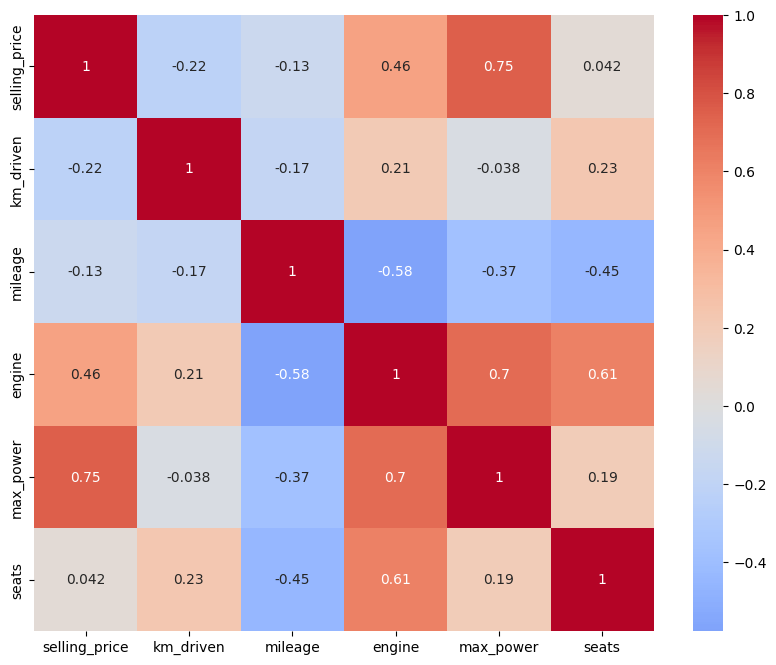

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
6
corr = df[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()


Realizamos un grafico de dispersion para observar la relaciones entre selling_price y seats.

(0.0, 10498500.05)

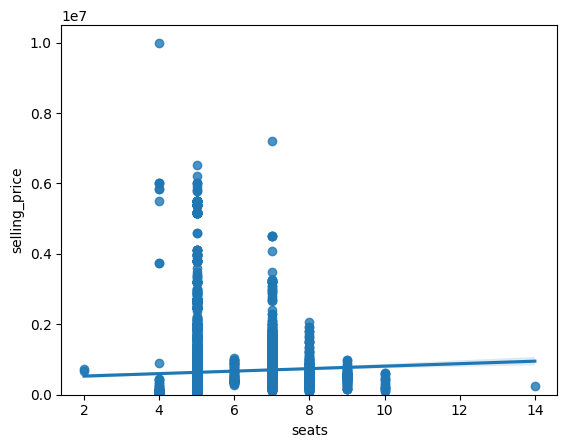

In [12]:
sns.regplot(x="seats", y="selling_price", data=df) #traza un grafico de dispersion donde comienza en 0 lo establece el limite 
plt.ylim(0,)

Realizamos un grafico de dispersion para observar la relaciones entre selling_price y max_power.

(0.0, 10519757.213531878)

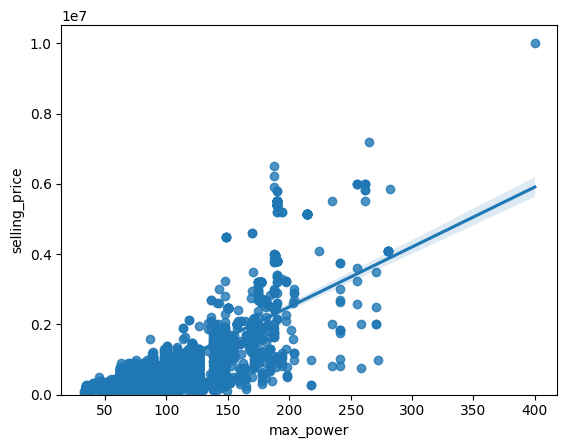

In [13]:
sns.regplot(x="max_power", y="selling_price", data=df) #traza un grafico de dispersion donde comienza en 0 lo establece el limite 
plt.ylim(0,)

Realizamos un grafico de dispersion para observar la relaciones entre selling_price y engine.

(0.0, 10499651.878061088)

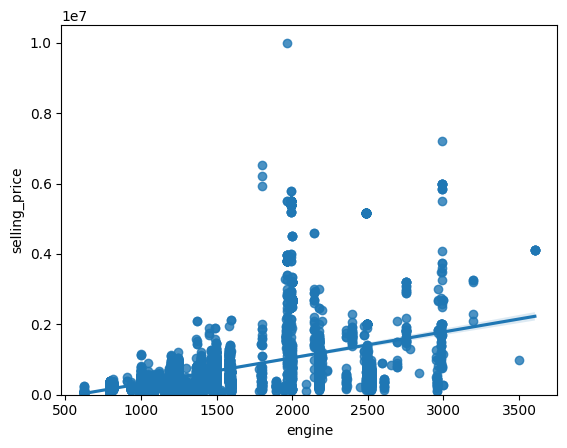

In [14]:
sns.regplot(x="engine", y="selling_price", data=df) #traza un grafico de dispersion donde comienza en 0 lo establece el limite 
plt.ylim(0,)

Realizamos un grafico de dispersion para observar la relaciones entre selling_price y mileage.

(0.0, 10501671.725738045)

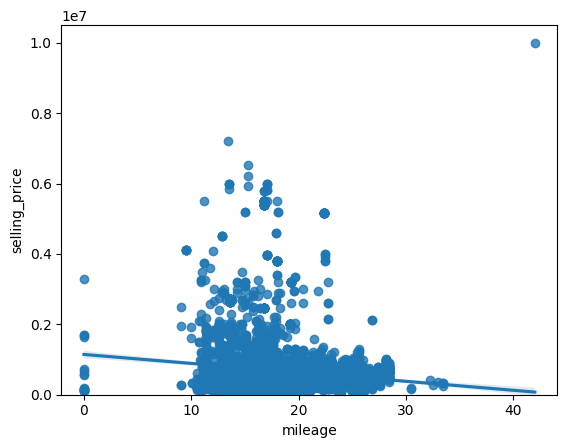

In [15]:
sns.regplot(x="mileage", y="selling_price", data=df) #traza un grafico de dispersion donde comienza en 0 lo establece el limite 
plt.ylim(0,)

<h4>Realizamos un mapeo o codificación de etiquetas a las columnas necesarias</h4>

In [16]:
# Diccionario que asigna un número a cada tipo de combustible
fuel_id = {
    'CNG': 1,
    'Diesel': 2,
    'LPG': 3,
    'Petrol': 4
}

# Crear una nueva columna 'fuel_id' utilizando el diccionario de tipos de combustible
df['fuel_id'] = df['fuel'].map(fuel_id)


In [17]:
# Diccionario que asigna un número a cada tipo de transmision
transmission_id = {
    'Manual': 1,
    'Automatic': 2,

}

# Crear una nueva columna 'transmision_id' utilizando el diccionario de tipos de transmision
df['transmission_id'] = df['transmission'].map(transmission_id)


In [18]:
# Diccionario que asigna un número a cada tipo de seller_type
seller_type_id = {
    'Dealer': 1,
    'Individual': 2,
    'Trustmark_Dealer': 3,
}

# Crear una nueva columna 'seller_type_id' utilizando el diccionario de tipos de seller_type
df['seller_type_id'] = df['seller_type'].map(seller_type_id)


In [19]:
import pandas as pd

# Diccionario que asigna un número a State or Province
state_id = {
    'Alabama': 1,
    'Arizona': 2,
    'Arkansas': 3,
    'California': 4,
    'Colorado': 5,
    'Connecticut': 6,
    'Delaware': 7,
    'District of Columbia': 8,
    'Florida': 9,
    'Georgia': 10,
    'Idaho': 11,
    'Illinois': 12,
    'Indiana': 13,
    'Iowa': 14,
    'Kansas': 15,
    'Kentucky': 16,
    'Louisiana': 17,
    'Maine': 18,
    'Maryland': 19,
    'Massachusetts': 20,
    'Michigan': 21,
    'Minnesota': 22,
    'Mississippi': 23,
    'Missouri': 24,
    'Montana': 25,
    'Nebraska': 26,
    'Nevada': 27,
    'New Hampshire': 28,
    'New Jersey': 29,
    'New Mexico': 30,
    'New York': 31,
    'North Carolina': 32,
    'North Dakota': 33,
    'Ohio': 34,
    'Oklahoma': 35,
    'Oregon': 36,
    'Pennsylvania': 37,
    'Rhode Island': 38,
    'South Carolina': 39,
    'South Dakota': 40,
    'Tennessee': 41,
    'Texas': 42,
    'Utah': 43,
    'Vermont': 44,
    'Virginia': 45,
    'Washington': 46,
    'West Virginia': 47,
    'Wisconsin': 48,
    'Wyoming': 49
}

# Crear una nueva columna 'state_id' utilizando el diccionario de State or Province
df['state_id'] = df['State or Province'].map(state_id)



In [20]:
import pandas as pd

# Diccionario que asigna un número a cada tipo de owner
owner_id = {
    'First_Owner': 1,
    'Second_Owner': 2,
    'Third_Owner': 3,
    'Fourth_Above_Owner': 4,
    'Test_Drive_Car': 5
}

# Crear una nueva columna 'owner_id' utilizando el diccionario de owner
df['owner_id'] = df['owner'].map(owner_id)


In [21]:
import pandas as pd

# Diccionario que asigna un número a cada tipo de name
brand_id = {
    'Ambassador': 1,
    'Ashok': 2,
    'Audi': 3,
    'BMW': 4,
    'Chevrolet': 5,
    'Daewoo': 6,
    'Datsun': 7,
    'Fiat': 8,
    'Force': 9,
    'Ford': 10,
    'Honda': 11,
    'Hyundai': 12,
    'Isuzu': 13,
    'Jaguar': 14,
    'Jeep': 15,
    'Kia': 16,
    'Land': 17,
    'Lexus': 18,
    'Mahindra': 19,
    'Maruti': 20,
    'Mercedes': 21,
    'MG': 22,
    'Mitsubishi': 23,
    'Nissan': 24,
    'Opel': 25,
    'Renault': 26,
    'Skoda': 27,
    'Tata': 28,
    'Toyota': 29,
    'Volkswagen': 30,
    'Volvo': 31
}

# Crear una nueva columna 'brand_id' utilizando el diccionario de name
df['brand_id'] = df['name'].map(brand_id)



### Hacemos un dummy para la columna sold

In [22]:
# Convertir la columna 'sold' a valores binarios
df['sold_binary'] = df['sold'].map({'Y': 1, 'N': 0})
# Mostrar las primeras filas del DataFrame con la nueva columna
print(df[['sold', 'sold_binary']].head())

  sold  sold_binary
0    Y            1
1    Y            1
2    Y            1
3    Y            1
4    Y            1


### Eliminamos cada columna original que reemplazamos en la parte superior debido a que insertamos una nueva en forma de diccionario 

In [23]:
df.drop('sold', axis=1, inplace=True)
df.drop('fuel', axis=1, inplace=True)
df.drop('transmission', axis=1, inplace=True)
df.drop('seller_type', axis=1, inplace=True)
df.drop('State or Province', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('owner', axis=1, inplace=True)

In [24]:
df.head()

,Sales_ID,year,selling_price,km_driven,Region,City,mileage,engine,max_power,torque,seats,fuel_id,transmission_id,seller_type_id,state_id,owner_id,brand_id,sold_binary
0,1,2014,450000,145500,East,Washington,23.40,1248,74.00,190Nm@ 2000rpm,5,2,1,2,8,1,20,1
1,2,2014,370000,120000,East,New York City,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,2,1,2,31,2,27,1
2,3,2006,158000,140000,Central,Chicago,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,4,1,2,12,3,11,1
3,4,2010,225000,127000,Central,Chicago,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,2,1,2,12,1,12,1
4,5,2007,130000,120000,East,New York City,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,4,1,2,31,1,20,1


### Realizamos un mapa de calor nuevamente con todas las variables que son candidatas para el modelo de prediccion y asi poder tomar una decision 

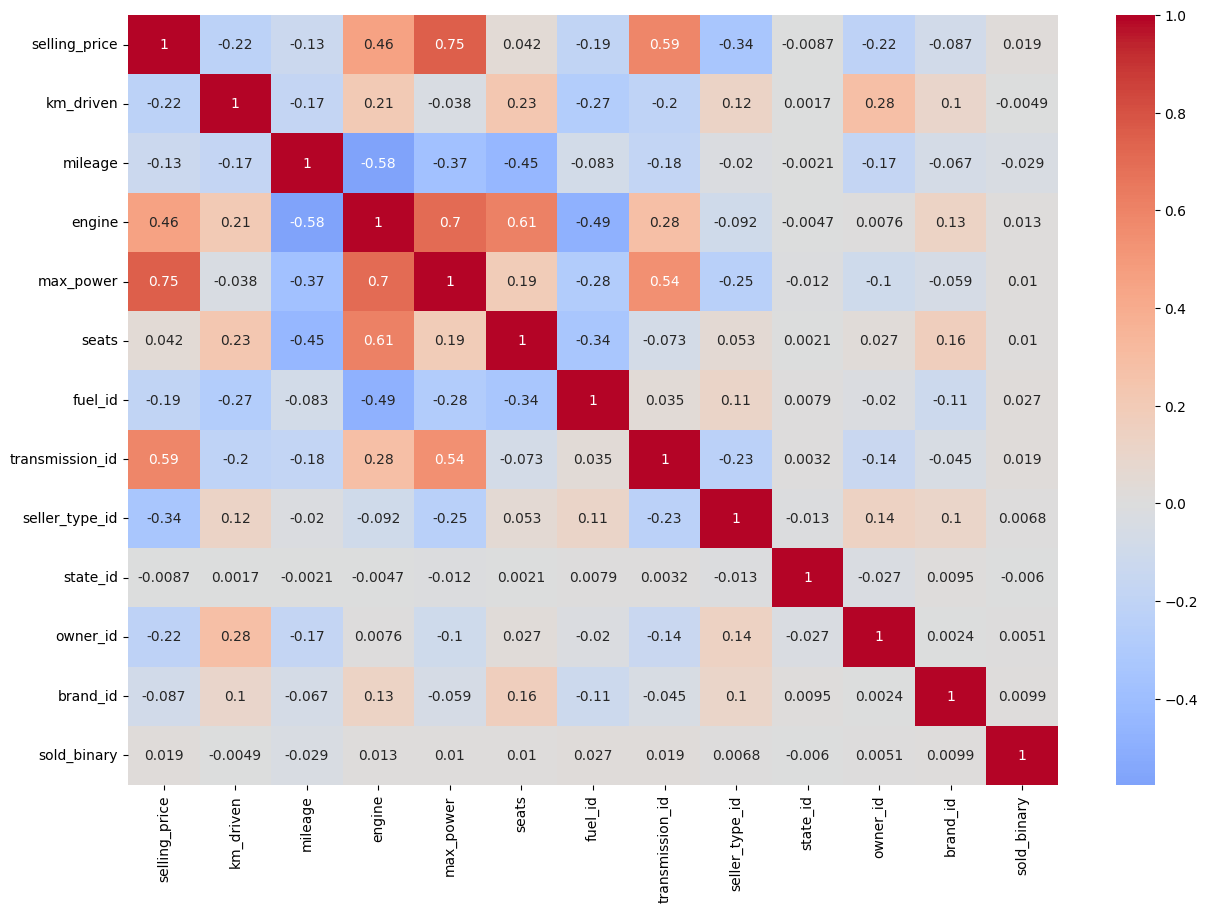

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que df es tu DataFrame
corr = df[['selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'seats',"fuel_id","transmission_id","seller_type_id","state_id","owner_id","brand_id","sold_binary"]].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.show()

Realizamos un grafico de dispersion para observar la relaciones entre selling_price y engine.

Realizamos un grafico de dispersion para observar la relaciones entre selling_price y max_power

Realizamos un grafico de dispersion para observar la relaciones entre selling_price y transmission_id.

(0.0, 10498500.05)

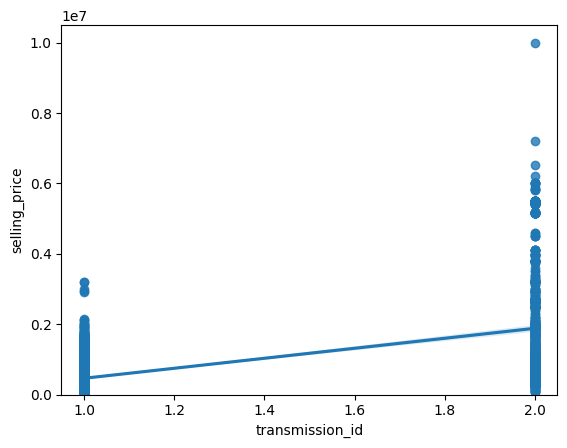

In [26]:

# Engine size as potential predictor variable of price
sns.regplot(x="transmission_id", y="selling_price", data=df)
plt.ylim(0,)

Realizamos un grafico de dispersion para observar la relaciones entre selling_price y seller_type_id.

(0.0, 10509790.657636002)

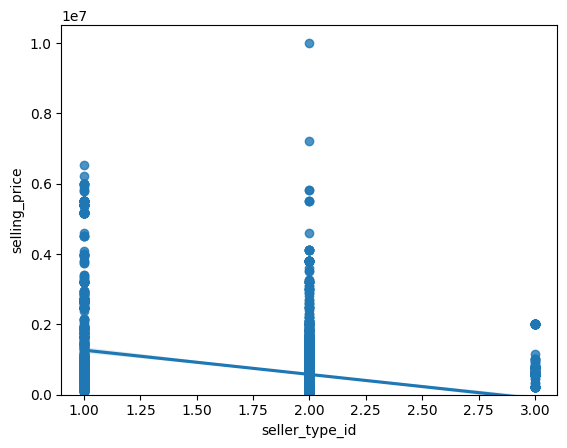

In [27]:

# Engine size as potential predictor variable of price
sns.regplot(x="seller_type_id", y="selling_price", data=df)
plt.ylim(0,)

Realizamos un grafico de dispersion para observar la relaciones entre selling_price y owner_id.

(0.0, 10515452.80475172)

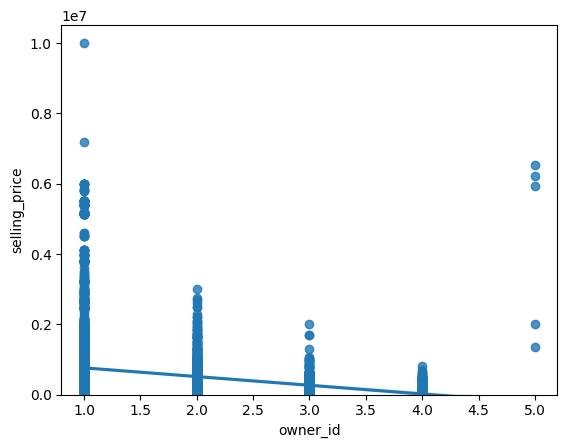

In [28]:

# Engine size as potential predictor variable of price
sns.regplot(x="owner_id", y="selling_price", data=df)
plt.ylim(0,)

Realizamos un grafico de dispersion para observar la relaciones entre selling_price y km_driven.

(0.0, 11006333.872935908)

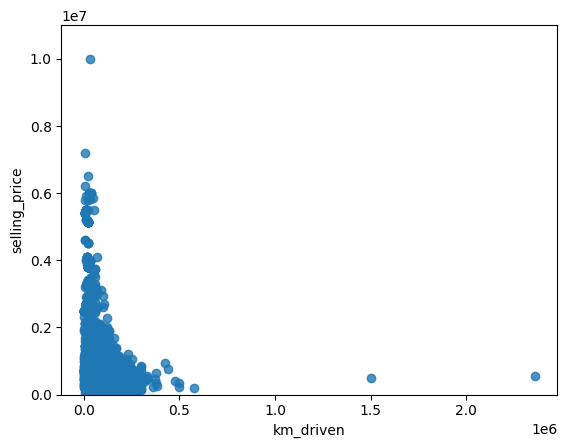

In [29]:

# Engine size as potential predictor variable of price
sns.regplot(x="km_driven", y="selling_price", data=df)
plt.ylim(0,)

### Nos muestra un conteo de cantidad de coches registrados por marca 

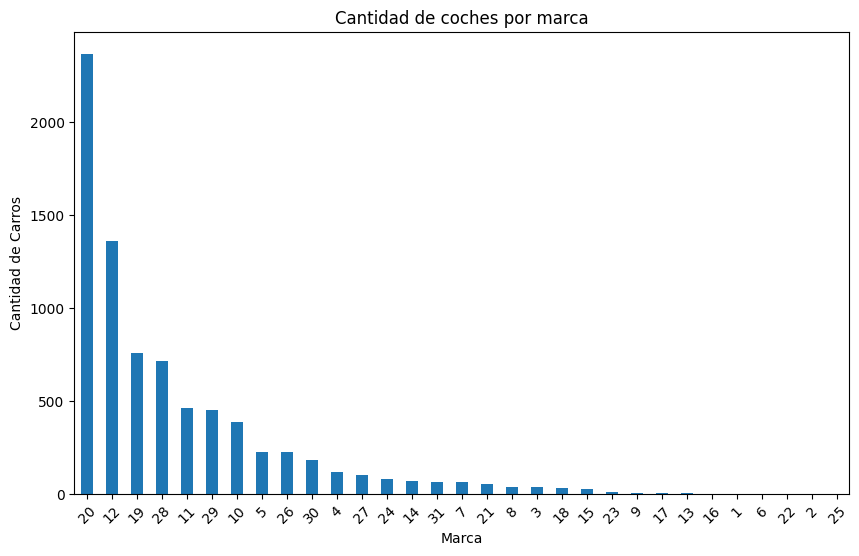

In [30]:
import matplotlib.pyplot as plt

# Contar la cantidad de carros por marca
carros_por_marca = df['brand_id'].value_counts()

# Graficar
plt.figure(figsize=(10, 6))
carros_por_marca.plot(kind='bar')
plt.title('Cantidad de coches por marca')
plt.xlabel('Marca')
plt.ylabel('Cantidad de Carros')
plt.xticks(rotation=45)
plt.show()

### Nos muestra un conteo de cantidad de registros por seller_type 

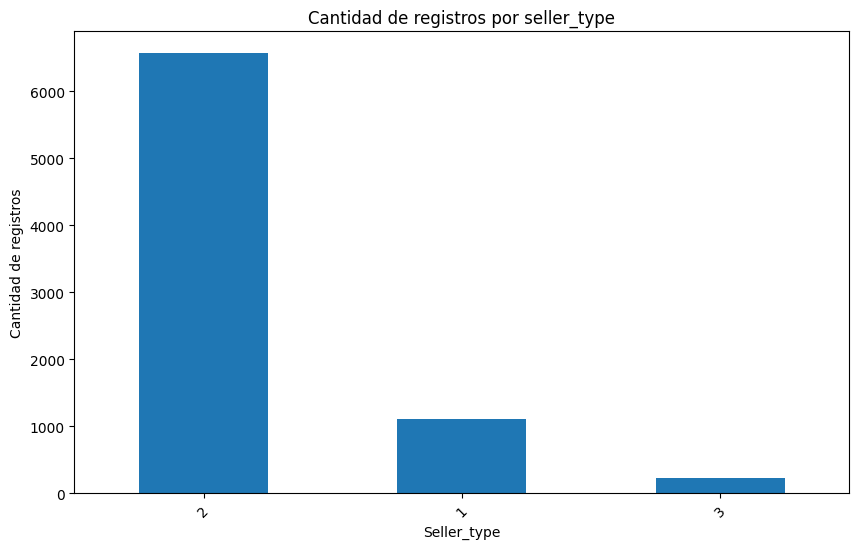

In [31]:
import matplotlib.pyplot as plt

# Contar la cantidad de registros por seller_type
seller_tiype_id = df['seller_type_id'].value_counts()

# Graficar
plt.figure(figsize=(10, 6))
seller_tiype_id .plot(kind='bar')
plt.title('Cantidad de registros por seller_type')
plt.xlabel('Seller_type')
plt.ylabel('Cantidad de registros')
plt.xticks(rotation=45)
plt.show()

<h4>Modelo</h4>

In [32]:
df.columns

Index(['Sales_ID', 'year', 'selling_price', 'km_driven', 'Region', 'City',
       'mileage', 'engine', 'max_power', 'torque', 'seats', 'fuel_id',
       'transmission_id', 'seller_type_id', 'state_id', 'owner_id', 'brand_id',
       'sold_binary'],
      dtype='object')

### Declaramos una variable y le asignamos la funcion LinearRegression()

In [33]:
lm = LinearRegression()
lm

LinearRegression()

### Seleccionamos las variables independientes de nuestro dataframe

In [34]:
Z = df[['engine', 'max_power', 'km_driven', 'transmission_id','owner_id','brand_id','fuel_id']]

### Esta línea de código está entrenando el modelo de regresión lineal lm a nuestros datos.

In [35]:
lm.fit(Z, df['selling_price'])

LinearRegression()

In [36]:
lm.intercept_

-567143.9654179397

In [37]:
lm.coef_

array([-1.09559545e+02,  1.43003187e+04, -1.99290900e+00,  5.57929386e+05,
       -9.17247588e+04, -3.28427338e+03, -8.08256407e+04])

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

<b>selling_price</b> = -567143.9654179397 + -1.09559545e+02 x <b>engine</b> + 1.43003187e+04 x <b>max_power</b> + 1.99290900e+00 x <b>km_driven</b> + 5.57929386e+05 x <b>transmission_id</b> + -9.17247588e+04 x <b>owner_id</b> + -3.28427338e+03 x <b>brand_id</b> + -8.08256407e+04 x <b>fuel_id</b>


In [38]:
Y_hat = lm.predict(Z)

C:\Users\Duvan\AppData\Local\Temp\ipykernel_16672\783837527.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['selling_price'], hist=False, color="g", label="Actual Value")
C:\Users\Duvan\AppData\Local\Temp\ipykernel_16672\783837527.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

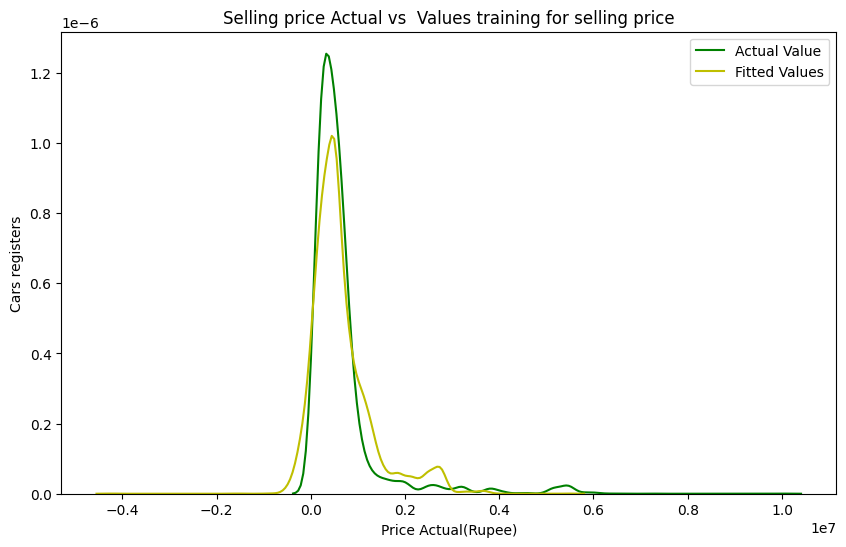

In [39]:
width = 10
height = 6
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['selling_price'], hist=False, color="g", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="y", label="Fitted Values" , ax=ax1)


plt.title('Selling price Actual vs  Values training for selling price')
plt.xlabel('Price Actual(Rupee)')
plt.ylabel('Cars registers')
plt.legend(loc='upper right')
plt.show()
plt.close()

### Calculo del R^2 que es una medida estadística que indica qué tan bien las predicciones del modelo se ajustan a los datos reales

In [40]:
print('The R-square is: ', lm.score(Z, df['selling_price']))

The R-square is:  0.646936838709085


### Este valor de R2 nos indica, que el modelo tiene un 64.7 de variabilidad en la variable de respuesta, en este caso al ser un valor superior de 50%, es un valor de gran aceptabilidad con un alto grado de precision

In [41]:
Y_predict_multifit = lm.predict(Z)

In [42]:
print('El error cuadrático medio del precio_de_venta y el valor predicho utilizando multifit es: ', \
      mean_squared_error(df['selling_price'], Y_predict_multifit))

El error cuadrático medio del precio_de_venta y el valor predicho utilizando multifit es:  233668909502.87607


### INTEGRANTES: DUVAN STID ORTIZ GOMEZ- RICARDO MOLINA GOMEZ
